# TP1

## Parte 1  (_/white-patch_ y _/coord-cromáticas_)

#### 1) Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste


Al leer una imagen con OpenCV, esta es representada por defecto en el espacio de color de BGR. Esta representación resulta muy sensible al cambio de contraste ya que el brillo está caracterizado de forma marginal en cada una de sus coordenada (B, G, y R). Según lo solicitado en el enunciado, debemos tomar la imagen y representarla en otro espacio de color, cuyas componentes sean menos sensibles a la iluminación de la imagen (por ejemplo, con HSV, donde el cambio de brillo sólo afecta la componente de Value).

_(Nota: OpenCV ya implementa una función que realiza esta transformación, llamada cvtColor, pero haremos nuestra propia implementación para satisfacer el enunciado)._



In [52]:
%matplotlib inline  
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')


# Intentemos hacer la conversión de manera matricial para que sea mas eficiente:
def BGR_to_HSV(img):
    
    # Aseguramos que los valores estén representados como float y normalizamos todos
    # los valores a un rango de 0 a 1 dividiendo por 255
    img = img.astype('float')
    img /= 255
    
    # Nos quedamos con la matriz de cada canal por separado
    b, g, r = cv.split(img)

    
    
    # Según las formulas del modelo HSV, necesitamos el máximo y 
    # mínimo de las tres componentes, y la diferencia, así que
    # creamos tres matrices con estos valores:
    max = np.max(img, axis=-1)
    min = np.min(img, axis=-1)
    diff = max - min

    # Inicializamos los canales H, S y V:
    h = np.zeros_like(max)
    s = np.zeros_like(max)
    
    # El Value es simplemente el color máximo del pixel, así que lo inicializamos así:
    v = max

    # Calculamos la saturación cuando la diferencia entre maximo y minimo
    # no es nula, si no dejamos la saturacion del pixel en 0
    s[diff > 0] = diff[diff > 0] / max[diff > 0]

    # Como la formula del tono (Hue) cambia según que color es el máximo en el pixel,
    # creamos máscaras y utilizamos cada formula por separado

    # Cuando R es el máximo
    mask = (max == r) & (diff > 0)
    h[mask] = (((g[mask] - b[mask]) / diff[mask]) % 6) * 60
    
    # cuando G es el máximo
    mask = (max == g) & (diff > 0)
    h[mask] = (((b[mask] - r[mask]) / diff[mask]) + 2) * 60
    
    # cuando B es el máximo
    mask = (max == b) & (diff > 0)
    h[mask] = (((r[mask] - g[mask]) / diff[mask]) + 4) * 60
    
    # Para comparar los resultados con la función de OpenCV, trasladamos los rangos de
    # cada componente (H entre 0 y 179, S y V entre 0 y 255)
    h /= 2
    s = s * 255
    v = v * 255
    
    # Devolvemos la matriz con los componentes calculados
    return np.stack([h, s, v], axis=-1).astype(int)


Ahora que tenemos la función creada, probaremos el algoritmo en las imágenes proporcionadas en el enunciado y las compararemos nuestro resultado con el del método de OpenCV para verificar que los valores coincidan.

Para ser la comparativa más fácil, graficaremos ambos resultados para cada imagen con matplotlib (como matplotlib sólo soporta RGB, las imágenes se van a ver muy extrañas. Lo importante es ver que son idénticas al resultado de OpenCV).

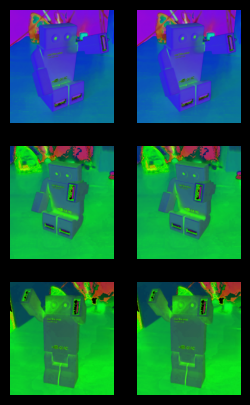

In [53]:
img1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
img2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
img3 = cv.imread('coord_cromaticas/CoordCrom_3.png')



img1_hsv = BGR_to_HSV(img1)
img2_hsv = BGR_to_HSV(img2)
img3_hsv = BGR_to_HSV(img3)

img1_hsv_ocv = cv.cvtColor(img1,cv.COLOR_BGR2HSV)
img2_hsv_ocv = cv.cvtColor(img2,cv.COLOR_BGR2HSV)
img3_hsv_ocv = cv.cvtColor(img3,cv.COLOR_BGR2HSV)

plt.figure(figsize=(3, 5)).patch.set_facecolor('black') # <- Marco oscuro
plt.subplot(3, 2, 1) 
plt.imshow(img1_hsv)
plt.axis('off')

plt.subplot(3, 2, 2) 
plt.imshow(img1_hsv_ocv)
plt.axis('off')

plt.subplot(3, 2, 3) 
plt.imshow(img2_hsv)
plt.axis('off')

plt.subplot(3, 2, 4) 
plt.imshow(img2_hsv_ocv)
plt.axis('off')

plt.subplot(3, 2, 5) 
plt.imshow(img3_hsv)
plt.axis('off')

plt.subplot(3, 2, 6) 
plt.imshow(img3_hsv_ocv)
plt.axis('off')

plt.show()





#### 2) Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

Según la teoria vista en clase, "white-patchear" una imagen significa dividir cada canal de color por su máximo (hablando en espacio de color RGB) y luego multiplicarlo por 255.

In [54]:
# Definimos una función que tome una imagen en BGR y aplique el white patch:
def white_patch(img):

    # Como vamos a dividir, nos aseguramos de estar interpretando los valores de la imagen
    # como flotantes:
    img = img.astype('float')

    # Separamos la imagen en sus espacios de color:
    b, g, r = cv.split(img)

    # Calculamos el máximo valor en cada canal
    max_b = np.max(b)
    max_g = np.max(g)
    max_r = np.max(r)

    # Ajustamos cada canal con el algoritmo de white patch, dividiendo
    # por el máximo valor y escalandolo a 255
    b = (b/max_b) * 255
    g = (g/max_g) * 255
    r = (r/max_r) * 255

    # Devolvemos la imagen corregida volviendo a mezclar los tres canales
    # y nos aseguramos que los valores sean tratados como enteros
    result = np.stack([b, g, r], axis=-1)
    return np.clip(result, 0, 255).astype(np.uint8)







Ahora vamos a cargar las imágenes proporcionadas por el enunciado, y ver su antes y después respecto al white patching:

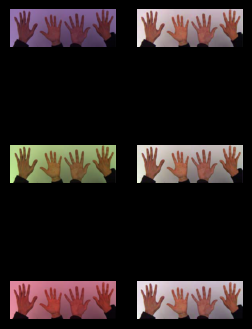

In [55]:
# Cargamos las imágenes
img1 = cv.imread('white_patch/test_blue.png')
img2 = cv.imread('white_patch/test_green.png')
img3 = cv.imread('white_patch/test_red.png')

# Las pasamos por la función que implementamos más arriba
img1_wp = white_patch(img1)
img2_wp = white_patch(img2)
img3_wp = white_patch(img3)

# Convertimos todo a RGB para poder graficarlo en matplot
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
img1_wp = cv.cvtColor(img1_wp,cv.COLOR_BGR2RGB)
img2_wp = cv.cvtColor(img2_wp,cv.COLOR_BGR2RGB)
img3_wp = cv.cvtColor(img3_wp,cv.COLOR_BGR2RGB)

# Ahora preparamos una graficación comparativa del antes y el después:

plt.figure(figsize=(3, 5)).patch.set_facecolor('black') # <- Marco oscuro
plt.subplot(3, 2, 1) 
plt.imshow(img1)
plt.axis('off')

plt.subplot(3, 2, 2) 
plt.imshow(img1_wp)
plt.axis('off')

plt.subplot(3, 2, 3) 
plt.imshow(img2)
plt.axis('off')

plt.subplot(3, 2, 4) 
plt.imshow(img2_wp)
plt.axis('off')

plt.subplot(3, 2, 5) 
plt.imshow(img3)
plt.axis('off')

plt.subplot(3, 2, 6) 
plt.imshow(img3_wp)
plt.axis('off')

plt.show()




## Parte 2

#### 1) Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

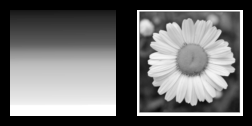

In [59]:
# Como son procedimientos ya hechos en el trabajo práctico, procedemos sin comentar:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(3, 5)).patch.set_facecolor('black') 
plt.subplot(1, 2, 1) 
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.show()

#### 2) Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
#### Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

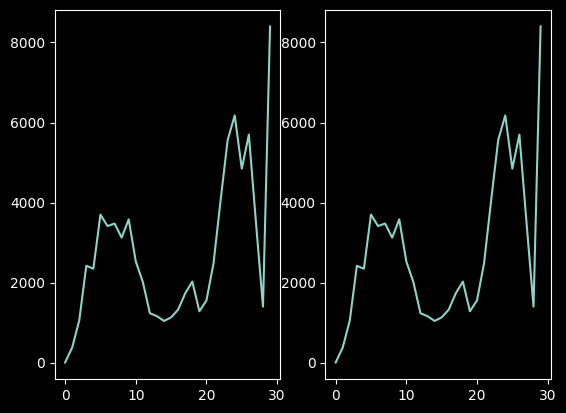

In [60]:
# Comenzamos por calcular y graficar los histogramas con las funciones de OpenCV y matplot:

hist1 = cv.calcHist([img1], [0], None, [30], [0, 256])
hist2 = cv.calcHist([img2], [0], None, [30], [0, 256])

plt.figure()

plt.subplot(1, 2, 1) 
plt.plot(hist1)

plt.subplot(1,2,2)
plt.plot(hist2)

plt.show()


Arriba estamos viendo los histogramas de las dos imágenes. El histograma de una imagen en escala de grises es esencialmente un gráfico de frecuencia, donde se ve cuantas vces un pixel tiene cada valor posible de luminosidad (entre 0 y 255 en estos casos).

Al parecer, si bien ambas imágenes son por completo distintas, los histogramas pueden asemejarse mucho, ya que sólo visualiza la frecuencia de los valores y para nada su distribución bidimencional, o cualquier otra relación entre los pixeles. Por lo tanto, es muy probable que no nos interese como feature en un modelo de clasificación/detección, salvo algún caso muy particular (donde la frecuencia de valores de luminosidad sea relevante por algún motivo, sin importar la relación entre los píxeles).

#### 3) Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

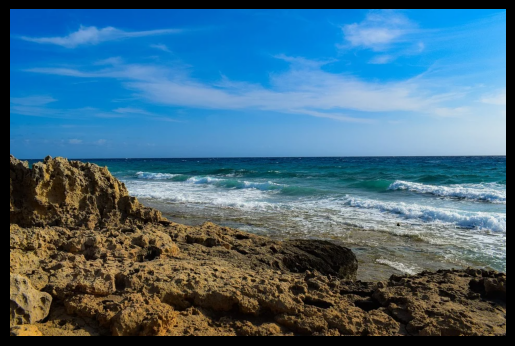

(628, 953, 3)


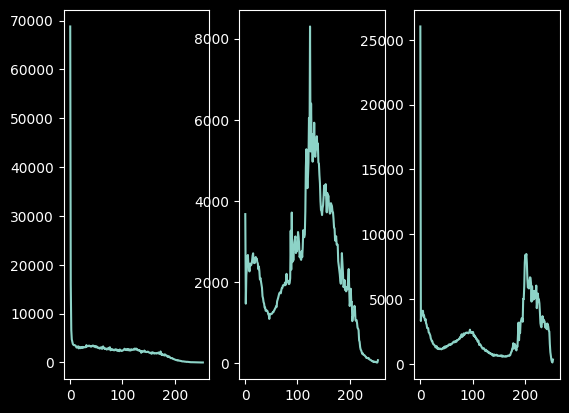

In [69]:
# Comencemos por cargar la imagen y separar sus canales para los histogramas
img = cv.imread('segmentacion.png')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
r, g, b = cv.split(img)

histR = cv.calcHist([r], [0], None, [255], [0, 256])
histG = cv.calcHist([g], [0], None, [255], [0, 256])
histB = cv.calcHist([b], [0], None, [255], [0, 256])

plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure()

plt.subplot(1, 3, 1) 
plt.plot(histR)

plt.subplot(1,3,2)
plt.plot(histG)

plt.subplot(1,3,3)
plt.plot(histB)

print(img.shape)
plt.show()


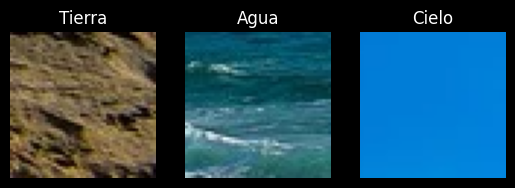

In [74]:
# Igual que se vio en clase con los morrones, tomamos muestras de cada franja que
# queremos separar:

land_sample = img[578:628, 903:953,:]
sea_sample = img[300:350, 500:550,:]
sky_sample = img[30:80, 500:550,:]


plt.figure()

plt.subplot(1, 3, 1) 
plt.title('Tierra')
plt.imshow(land_sample)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Agua')
plt.imshow(sea_sample)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Cielo')
plt.imshow(sky_sample)
plt.axis('off')

plt.show()

Ahora que tenemos las dimensiones de los parches de muestra, debemos definir un descriptor estadístico con la media del color del parche.

Como vimos en clase, para esto es muy conveniente usar un espacio de color como HSV; donde podemos caracterizar los colores sin menos correlación entre los tres canales. A continuación, convertiremos la imagen a HSV y tomaremos los mismos parches para crear estos descriptores:

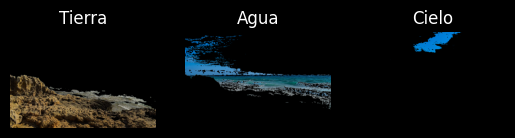

In [92]:
# Usaremos HSV para procesar la imagen mejor:
img_HSV = cv.cvtColor(img,cv.COLOR_RGB2HSV)

# Nos quedamos con muestras en espacio HSV
land_sample_HSV = img_HSV[578:628, 903:953,:]
sea_sample_HSV = img_HSV[300:350, 500:550,:]
sky_sample_HSV = img_HSV[30:80, 500:550,:]

# Utilizaemos la función de 'meanStdDev' de OpenCV, ya que la media de valores servirá como
# un descriptor estadístico sencillo de las tres franjas en este ejemplo:
land_mean, land_std = cv.meanStdDev(land_sample_HSV)
sea_mean, sea_std = cv.meanStdDev(sea_sample_HSV)
sky_mean, sky_std = cv.meanStdDev(sky_sample_HSV)

# Creamos máscaras con los píxeles cuyos valores entren en un rango de 3 desvios estándar
# respecto al descriptor que creamos (la media de cada componente del pixel en HSV)
sigma = 3
mask_land = cv.inRange(img_HSV, land_mean - land_std * sigma, land_mean + land_std * sigma)
mask_sea = cv.inRange(img_HSV, sea_mean - sea_std * sigma, sea_mean + sea_std * sigma)
mask_sky = cv.inRange(img_HSV, sky_mean - sky_std * sigma, sky_mean + sky_std * sigma)


# Aplicamos la máscaras a la imagen en RGB para quedarnos con los píxeles dentro de ellas
land_img = cv.bitwise_and(img, img, mask=mask_land)
sea_img = cv.bitwise_and(img, img, mask=mask_sea)
sky_img = cv.bitwise_and(img, img, mask=mask_sky)

# Visualizamos los resultados como fragmentos de imagen:

plt.figure()

plt.subplot(1, 3, 1) 
plt.title('Tierra')
plt.imshow(land_img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Agua')
plt.imshow(sea_img)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Cielo')
plt.imshow(sky_img)
plt.axis('off')

plt.show()



Como vemos, la segmentación de la tierra y el agua es bastante buena, aunque la del cielo no. Esto era esperable ya que las nubes hacen que la franja sea bastante heterogénea.

Algo que podemos hacer es intentar tomar una muestra distinta o bien usar un sigma mayor para la creación de la máscara. Sin embargo, como veremos a continuación, la segmentación sólo mejora un poco antes de empezar a tomar píxeles de la franja de mar (a sigmas bastante elevados)

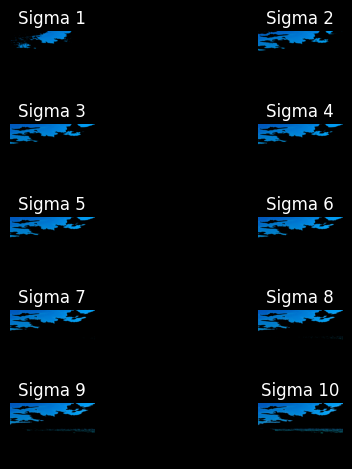

In [97]:
# Utilizamos la misma muestra y lo volvemos a intentar con valores cada vez mayore
# de sigma:

for i in range(1,11):
    mask_sky = cv.inRange(img_HSV, sky_mean - sky_std * sigma * 2*i, sky_mean + sky_std * sigma * 2*i)
    sky_img = cv.bitwise_and(img, img, mask=mask_sky)
    plt.subplot(5, 2, i)
    plt.title(f'Sigma {i}')
    plt.imshow(sky_img)
    plt.axis('off')
    
plt.tight_layout()
plt.show()


Aqui podemos ver con claridad como los parches faltantes son las nubes en la iamgen original. Otros enfoques pueden tomarse, como considerar las nubes una franja distinta a seccionar.